## 3. Stepwise forward selection.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
dataframe = read_csv('heart.csv')
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Separate features from labels 
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 103/303, random_state = 42)

### (a) Use this procedure to find a k-sparse logistic regression solution for the heart disease data, for k = 1, 2, . . . , 13. Create a single plot showing the test error and cross-validation error for all these values of k.

In [4]:
# FIRST OPTION: hand written stepwise forward selection

def sfs_function(x_train_data, y_train_data, x_test_data, y_test_data, feature_number):
    
    cve = []
    te = []
    s = []
    s_test_error = []
    s_cross_validation_error = []
    n = x_train_data.shape[1]
    select_number = 0
    
    clf = LogisticRegression(random_state = 42).fit(x_train_data, y_train_data)
       
    for k in range(1, feature_number + 1):
        print('k =', k)
        cross_validation_error = 1
        
        for i in range(n):
            if i not in s:
                current_accuracy = cross_val_score(clf, x_train_data[:, s+[i]], y_train_data, scoring = 'accuracy', cv = 10)
                current_error = 1 - np.mean(current_accuracy)
                if current_error < cross_validation_error:
                    cross_validation_error = current_error
                    select_number = i
                    
        if select_number not in s:
            s.append(select_number)
            print('s =', s)
        
        s_cross_validation_error.append(cross_validation_error)
        mse_cross_val_error = np.mean(s_cross_validation_error)
        print('cross validation error =', mse_cross_val_error)
        
        clf.fit(x_train_data[:,s], y_train_data)
        test_error = 1 - clf.score(x_test_data[:,s], y_test_data)
        s_test_error.append(test_error)
        mse_test_error = np.mean(s_test_error)
        print('test error =', mse_test_error)
        
        cve.append(mse_cross_val_error)
        te.append(mse_test_error)
        
        print('\n')
    return s, mse_cross_val_error, mse_test_error, te, cve

In [5]:
s, cross_validation_error, test_error, te, cve = sfs_function(X_train, y_train, X_test, y_test, 13)
s, cross_validation_error, test_error, te, cve

k = 1
s = [2]
cross validation error = 0.24
test error = 0.24271844660194175


k = 2
s = [2, 11]
cross validation error = 0.23249999999999993
test error = 0.27184466019417475


k = 3
s = [2, 11, 12]
cross validation error = 0.2133333333333333
test error = 0.2524271844660194


k = 4
s = [2, 11, 12, 10]
cross validation error = 0.19874999999999998
test error = 0.24514563106796117


k = 5
s = [2, 11, 12, 10, 4]
cross validation error = 0.19
test error = 0.24077669902912618


k = 6
s = [2, 11, 12, 10, 4, 5]
cross validation error = 0.18416666666666667
test error = 0.2378640776699029


k = 7
s = [2, 11, 12, 10, 4, 5, 1]
cross validation error = 0.1814285714285714
test error = 0.23300970873786403


k = 8
s = [2, 11, 12, 10, 4, 5, 1, 7]
cross validation error = 0.17874999999999996
test error = 0.22815533980582525


k = 9
s = [2, 11, 12, 10, 4, 5, 1, 7, 3]
cross validation error = 0.17611111111111105
test error = 0.2243797195253506


k = 10
s = [2, 11, 12, 10, 4, 5, 1, 7, 3, 0]
cross validatio

([2, 11, 12, 10, 4, 5, 1, 7, 3, 0, 6, 9, 8],
 0.17076923076923067,
 0.2135922330097087,
 [0.24271844660194175,
  0.27184466019417475,
  0.2524271844660194,
  0.24514563106796117,
  0.24077669902912618,
  0.2378640776699029,
  0.23300970873786403,
  0.22815533980582525,
  0.2243797195253506,
  0.22135922330097085,
  0.21888790820829654,
  0.21521035598705499,
  0.2135922330097087],
 [0.24,
  0.23249999999999993,
  0.2133333333333333,
  0.19874999999999998,
  0.19,
  0.18416666666666667,
  0.1814285714285714,
  0.17874999999999996,
  0.17611111111111105,
  0.17399999999999993,
  0.17272727272727265,
  0.17124999999999993,
  0.17076923076923067])

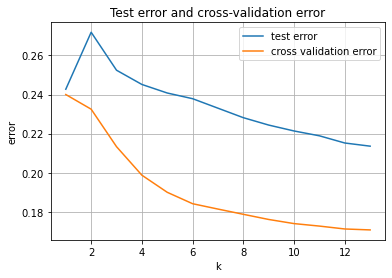

In [6]:
k = np.arange(1,14,1)
plt.xlabel('k')
plt.ylabel('error')
plt.title('Test error and cross-validation error')
plt.plot(k, te, label = 'test error')
plt.plot(k, cve, label = 'cross validation error')
plt.legend()
plt.grid()
plt.show()

In [7]:
# SECOND OPTION: call the SequentialFeatureSelector package to compare the results

# Build logistic regression classifier to use in feature selection
clf = LogisticRegression(random_state = 42).fit(X_train, y_train)

test_error = []
cross_validation_error = []

for k in range(1, 14):
    # Build step forward feature selection
    sfs1 = sfs(clf,
               k_features=k,
               forward=True,
               floating=False,
               scoring='accuracy',
               cv=5)
    print('\nk =', k)

    sfs1 = sfs1.fit(X_train, y_train)

    # select features
    feat_cols = list(sfs1.k_feature_idx_)

    # Build model with selected features
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train[:, feat_cols], y_train)

    y_test_pred = clf.predict(X_test[:, feat_cols])

    y_test_error = 1 - acc(y_test, y_test_pred)
    print('Test error: %.3f' % y_test_error)
    
    test_error.append(y_test_error)
    
    scores = cross_val_score(clf, X_train[:, feat_cols], y_train, cv=10)

    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    error_rate = 1 - scores.mean()
    print('Cross-Validation error:', error_rate)
    
    cross_validation_error.append(error_rate)   


k = 1
Test error: 0.243
Cross-Validation error: 0.24

k = 2
Test error: 0.301
Cross-Validation error: 0.22499999999999998

k = 3
Test error: 0.214
Cross-Validation error: 0.17499999999999982

k = 4
Test error: 0.204
Cross-Validation error: 0.16500000000000004

k = 5
Test error: 0.204
Cross-Validation error: 0.16500000000000004

k = 6
Test error: 0.204
Cross-Validation error: 0.16500000000000004

k = 7
Test error: 0.204
Cross-Validation error: 0.16999999999999993

k = 8
Test error: 0.204
Cross-Validation error: 0.15999999999999992

k = 9
Test error: 0.204
Cross-Validation error: 0.18000000000000005

k = 10
Test error: 0.194
Cross-Validation error: 0.16999999999999993

k = 11
Test error: 0.184
Cross-Validation error: 0.16999999999999993

k = 12
Test error: 0.175
Cross-Validation error: 0.15500000000000003

k = 13
Test error: 0.194
Cross-Validation error: 0.1649999999999998


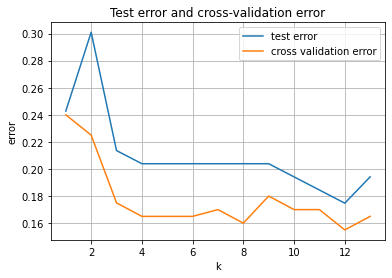

In [8]:
k = np.arange(1,14,1)
plt.xlabel('k')
plt.ylabel('error')
plt.title('Test error and cross-validation error')
plt.plot(k, test_error, label = 'test error')
plt.plot(k, cross_validation_error, label = 'cross validation error')
plt.legend()
plt.grid()
plt.show()

### (b) What two features were chosen for k = 2? Plot the decision boundary in this case.

In [9]:
# FIRST OPTION: call the hand written sfs_function

s_2, cross_validation_error_2, test_error_2, te_2, cve_2 = sfs_function(X_train, y_train, X_test, y_test, 2)

feature_1_1 = dataframe.columns[s_2[0]]
feature_2_1 = dataframe.columns[s_2[1]]

print('two features selected:', feature_1_1, feature_2_1)

k = 1
s = [2]
cross validation error = 0.24
test error = 0.24271844660194175


k = 2
s = [2, 11]
cross validation error = 0.23249999999999993
test error = 0.27184466019417475


two features selected: cp ca


In [10]:
# SECOND OPTION: call the SequentialFeatureSelector package to compare the results

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=2,
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
feat_cols = list(sfs1.k_feature_idx_)
#print('Features selected:', feat_cols)

clf = LogisticRegression(random_state=42)
clf.fit(X_train[:, feat_cols], y_train)


feature_1_2 = dataframe.columns[feat_cols[0]]
feature_2_2 = dataframe.columns[feat_cols[1]]

print('two features selected:', feature_1_2, feature_2_2)

two features selected: cp ca


In [11]:
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

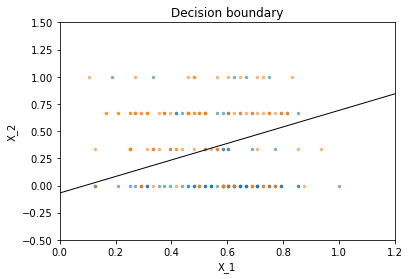

In [12]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 1.2
ymin, ymax = -0.5, 1.5

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.title('Decision boundary')
plt.xlabel('X_1')
plt.ylabel('X_2')

plt.plot(xd, yd, 'k', lw=1, ls='-')
plt.scatter(*X_train[:,[0,2]][y_train==0].T, s = 6, alpha = 0.5)
plt.scatter(*X_train[:,[0,2]][y_train==1].T, s = 6, alpha = 0.5)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()